train.csv: A full training dataset with the following attributes:

* id: unique id for a news article
* title: the title of a news article
* author: author of the news article
* text: the text of the article; could be incomplete
* label: a label that marks the article as potentially unreliable
* 1: unreliable
* 0: reliable

source: https://www.kaggle.com/c/fake-news/overview

In [30]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from wordcloud import WordCloud
import re

# 1. Data Exploration

In [31]:
df = pd.read_csv('dataset/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [32]:
df.shape

(20800, 5)

In [33]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [35]:
# adding a new column that combines all the fields: title, author, and text
df['all'] = df['title'] + ' ' + df['author'] + ' ' + df['text']
df.head()

,id,title,author,text,label,all
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [36]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
all       2515
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
 5   all     18285 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


In [38]:
##### can the sum nan values of 'all' be higher than the other columns? ######

In [39]:
# dropping rows where title = NaN
df_drop = df.dropna(subset=['all'])
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
 5   all     18285 non-null  object
dtypes: int64(2), object(4)
memory usage: 1000.0+ KB


In [40]:
### using wordcloud to visualize common words for both reliable and unrealible news ###
reliable = df_drop[df['label'] == 0]
unreliable = df_drop[df['label'] == 1]

/Users/emiliobello/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emiliobello/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# converting to list
rel_words = reliable['all'].astype(str).tolist()
unrel_words = unreliable['all'].astype(str).tolist()

In [42]:
# joining into one string
rel_words_onestring = " ".join(rel_words)
unrel_words_onestring = " ".join(unrel_words)

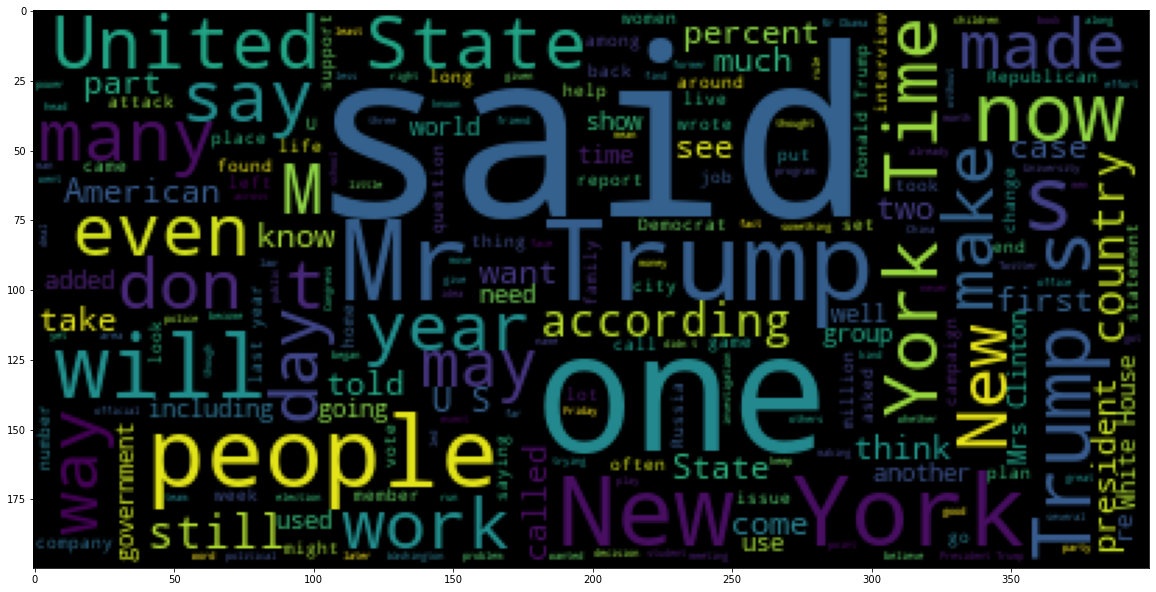

In [43]:
# plotting reliable news
plt.figure(figsize=(20,20));
plt.imshow(WordCloud().generate(rel_words_onestring));
plt.show();

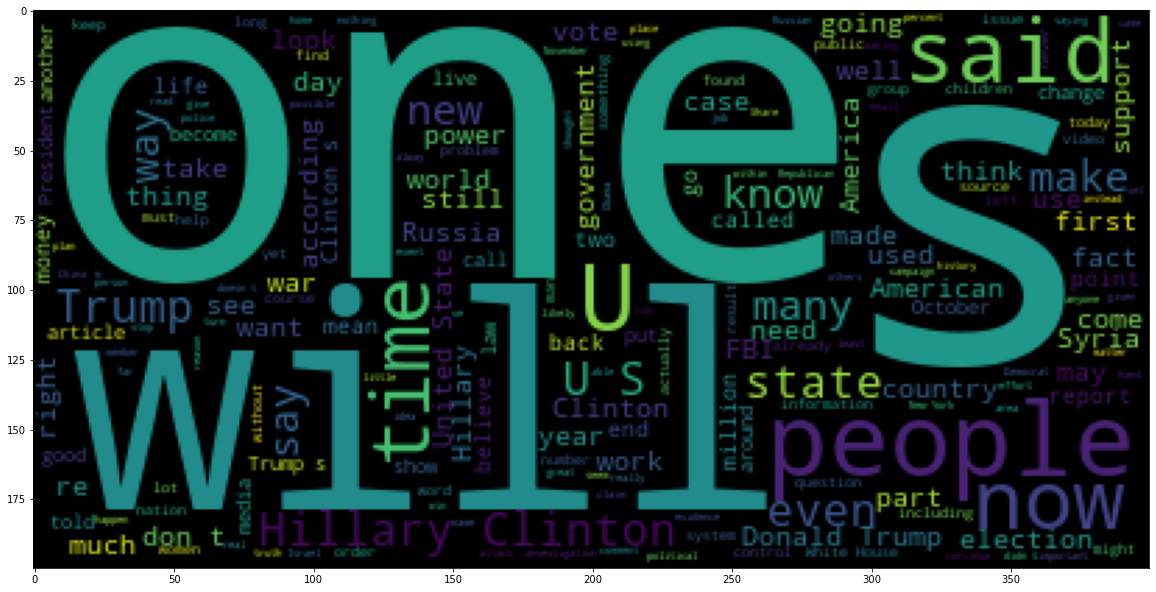

In [44]:
# plotting unrealiable news
plt.figure(figsize=(20,20));
plt.imshow(WordCloud().generate(unrel_words_onestring));
plt.show();

In [45]:
# reliable vs unrealiable split
print( 'Unreliable percentage =', round((len(unreliable) / len(df_drop) )*100, 2),"%")
print( 'Reliable percentage =', round((len(reliable) / len(df_drop) )*100, 2),"%")

Unreliable percentage = 43.34 %
Reliable percentage = 56.66 %


/Users/emiliobello/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


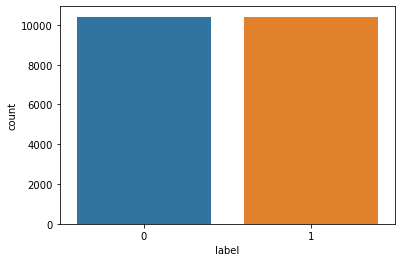

In [46]:
# visualizing reliable vs unrealiable
sns.countplot(df['label'], label = "Count");

# 2. Preprocessing

In [101]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')



def text_cleaning(message):
    
    message_lower = message.str.lower()
    # removing possesives and contractions
    p_c_removed = message_lower.replace("’s","",regex=True)
    # replacing '\n' with blank space
    blank_spc_removed = p_c_removed.replace('\n',' ', regex=True)
    # removing special characters (regex)
    spec_char_removed = blank_spc_removed.replace('[^A-Za-z0-9\s]+', '',regex=True)
    # removing leading and trailing spaces
    space_removed = spec_char_removed.str.strip()
    # split (tokenization)
    split = space_removed.str.split()
    # removing stop words
    stop_words_removed = [w for w in split if w not in stopwords.words('english')] # if not w in stopwords.words('english')
    
    
#     stem_removed = [stemmer.stem(word) for word in split if word not in stopwords.words('english')]
#     cleaned = ' '.join(stem_removed)
    return stop_words_removed #stem_removed

In [104]:
# clean_data = df_drop['all'].apply(text_cleaning)
clean_data = text_cleaning(df_drop['all'])

In [107]:
print(clean_data[-1])

['what', 'keeps', 'the', 'f35', 'alive', 'david', 'swanson', 'david', 'swanson', 'is', 'an', 'author', 'activist', 'journalist', 'and', 'radio', 'host', 'he', 'is', 'a', '2015', 'nobel', 'peace', 'prize', 'nominee', 'he', 'is', 'director', 'of', 'worldbeyondwarcom', 'and', 'campaign', 'coordinator', 'for', 'rootsactionorg', 'he', 'hosts', 'talk', 'nation', 'radio', 'talk', 'nation', 'radio', 'is', 'on', 'vt', 'radio', 'and', 'is', 'syndicated', 'by', 'pacifica', 'network', 'the', 'show', 'also', 'airs', 'on', 'wtju', 'charlottesville', 'va', 'wcsxdetroit', 'mi', 'kghi', 'westport', 'wa', 'whus', 'storrs', 'ct', 'wprr', 'grand', 'rapids', 'mi', 'krfplp', 'moscow', 'id', 'kzgm', 'cabool', 'mo', 'kmud', 'garberville', 'ca', 'wazu', 'peoria', 'il', 'wxrd', 'crown', 'point', 'in', 'geneva', 'radio', 'geneva', 'ny', 'kkrn', 'round', 'mountain', 'ca', 'kskqlp', 'ashland', 'or', 'wuowlp', 'oneonta', 'ny', 'no', 'lies', 'radio', 'pinole', 'ca', 'wyaplp', 'clay', 'wv', 'the', 'detour', 'johnson'

In [ ]:
# removing leading and trailing spaces from 'all'
# df_trim = df_regex[['label', 'all']]
# df_trim['all'] = df_regex['all'].str.strip()

In [ ]:
# checking for empty rows
df_trim.loc[df_trim['all'] == '']

In [ ]:
# final DF for preprocessing
df_news = df_trim.loc[df_trim['all'] != '']
df_news.head()

In [ ]:
# df_news.tail()

In [ ]:
# # convert 'all' text column to lower case
# df_news['all'] = df_news['all'].str.lower()
# df_news.head()

In [ ]:
# splitting by words, and removing stopwords (previously installed nltk in the PythonML env: python -m nltk.downloader all)

# from nltk.corpus import stopwords
# split_stop_df = [word for word in df_news['all'].str.split() if word not in stopwords.words('english')]

In [ ]:
split_stop_df

In [ ]:
# converting list of words into vectors
from sklearn.feature_extraction.text import CountVectorizer
vectorizer =  CountVectorizer(analyzer=split_stop_df, stop_words='english', ngram_range=(1,2), lowercase=False) # consider max_features and other params
X = vectorizer.fit_transform(df_news['all'])
X = X.toarray()

In [ ]:
X